# Forest Cover Type Classification

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")

print("Path to dataset files:", path)

/home/uttam/Machine-Learning-LAB/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 11.2M/11.2M [00:06<00:00, 1.75MB/s]

Extracting files...


Path to dataset files: /home/uttam/.cache/kagglehub/datasets/uciml/forest-cover-type-dataset/versions/1


In [2]:
import pandas as pd

df = pd.read_csv("covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Data Preprocessing

In [3]:

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget variable (Cover_Type) distribution:")
print(df['Cover_Type'].value_counts().sort_index())

Dataset shape: (581012, 55)

First few rows:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235         

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)

In [5]:

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

print("Original dataset shape:", X.shape)
print("Target classes:", sorted(y.unique()))
print("Class distribution:")
print(y.value_counts().sort_index())


print("\nFeature analysis:")
print("Total features:", len(X.columns))
print("Feature names:", list(X.columns))

Original dataset shape: (581012, 54)
Target classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Class distribution:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

Feature analysis:
Total features: 54
Feature names: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'S

In [6]:

continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                      'Horizontal_Distance_To_Fire_Points']

binary_features = [col for col in X.columns if col not in continuous_features]

print("Continuous features:", len(continuous_features))
print("Binary features (dummy variables):", len(binary_features))

# Check for any missing values
print("\nMissing values:")
print(X.isnull().sum().sum())

# Basic statistics for continuous features
print("\nContinuous features statistics:")
print(X[continuous_features].describe())

Continuous features: 10
Binary features (dummy variables): 44

Missing values:
0

Continuous features statistics:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                     

In [7]:

sample_size = int(0.2 * len(df))
print(f"Reducing dataset from {len(df)} to {sample_size} samples")

# Stratified sampling to maintain class distribution
X_sample, _, y_sample, _ = train_test_split(
    X, y, test_size=0.8, stratify=y, random_state=42
)

print(f"Sampled dataset shape: {X_sample.shape}")
print("Sampled class distribution:")
print(y_sample.value_counts().sort_index())

Reducing dataset from 581012 to 116202 samples
Sampled dataset shape: (116202, 54)
Sampled class distribution:
Cover_Type
1    42368
2    56660
3     7151
4      549
5     1899
6     3473
7     4102
Name: count, dtype: int64


In [8]:
# Split: 70% train, 15% test, 15% validation

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=42
)

# Second split: Split the 30% into 15% test and 15% validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Dataset splits:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Validation set: {X_val.shape}")

print("\nClass distribution in each set:")
print("Training set:")
print(y_train.value_counts().sort_index())
print("\nTest set:")
print(y_test.value_counts().sort_index())
print("\nValidation set:")
print(y_val.value_counts().sort_index())

Dataset splits:
Training set: (81341, 54)
Test set: (17430, 54)
Validation set: (17431, 54)

Class distribution in each set:
Training set:
Cover_Type
1    29658
2    39662
3     5006
4      384
5     1329
6     2431
7     2871
Name: count, dtype: int64

Test set:
Cover_Type
1    6355
2    8499
3    1072
4      83
5     285
6     521
7     615
Name: count, dtype: int64

Validation set:
Cover_Type
1    6355
2    8499
3    1073
4      82
5     285
6     521
7     616
Name: count, dtype: int64


In [9]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_val_scaled = X_val.copy()

# Scale continuous features
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])
X_val_scaled[continuous_features] = scaler.transform(X_val[continuous_features])

print("Feature scaling completed.")
print("Continuous features have been standardized (mean=0, std=1)")
print("Binary features remain unchanged")

print("\nScaled continuous features stats (training set):")
print(X_train_scaled[continuous_features].describe().round(3))

Feature scaling completed.
Continuous features have been standardized (mean=0, std=1)
Binary features remain unchanged

Scaled continuous features stats (training set):
       Elevation     Aspect      Slope  Horizontal_Distance_To_Hydrology  \
count  81341.000  81341.000  81341.000                         81341.000   
mean      -0.000      0.000     -0.000                            -0.000   
std        1.000      1.000      1.000                             1.000   
min       -3.879     -1.392     -1.884                            -1.267   
25%       -0.534     -0.873     -0.684                            -0.760   
50%        0.129     -0.255     -0.150                            -0.244   
75%        0.729      0.937      0.517                             0.563   
max        3.186      1.832      6.251                             5.289   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                       81341.000                        81341.000  

## Part A: 2D Logistic Regression with 2 Features and 3 Classes

In [10]:
top_3_classes = y_train.value_counts().head(3).index.tolist()
print("Selected 3 classes:", top_3_classes)
print("Class names and counts:")
for cls in top_3_classes:
    count = (y_train == cls).sum()
    print(f"Class {cls}: {count} samples")

# Select 2 most informative continuous features
feature_variances = X_train_scaled[continuous_features].var().sort_values(ascending=False)
print("\nFeature variances (top 5):")
print(feature_variances.head())

selected_features = feature_variances.head(2).index.tolist()
print(f"\nSelected 2 features: {selected_features}")

# Filter data for the selected classes and features
mask_train = y_train.isin(top_3_classes)
mask_test = y_test.isin(top_3_classes)
mask_val = y_val.isin(top_3_classes)

X_train_2features = X_train_scaled.loc[mask_train, selected_features].values
X_test_2features = X_test_scaled.loc[mask_test, selected_features].values
X_val_2features = X_val_scaled.loc[mask_val, selected_features].values

y_train_3class = y_train[mask_train]
y_test_3class = y_test[mask_test]
y_val_3class = y_val[mask_val]

print(f"\nFiltered dataset shapes:")
print(f"Training: {X_train_2features.shape}, {len(y_train_3class)} labels")
print(f"Test: {X_test_2features.shape}, {len(y_test_3class)} labels")
print(f"Validation: {X_val_2features.shape}, {len(y_val_3class)} labels")

Selected 3 classes: [2, 1, 3]
Class names and counts:
Class 2: 39662 samples
Class 1: 29658 samples
Class 3: 5006 samples

Feature variances (top 5):
Elevation                             1.000012
Slope                                 1.000012
Horizontal_Distance_To_Fire_Points    1.000012
Hillshade_Noon                        1.000012
Aspect                                1.000012
dtype: float64

Selected 2 features: ['Elevation', 'Slope']

Filtered dataset shapes:
Training: (74326, 2), 74326 labels
Test: (15926, 2), 15926 labels
Validation: (15927, 2), 15927 labels


In [11]:
# Train Logistic Regression for 3-class classification
log_reg_3class = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=1000
)

# Fit the model
log_reg_3class.fit(X_train_2features, y_train_3class)

# Make predictions
y_train_pred_3class = log_reg_3class.predict(X_train_2features)
y_test_pred_3class = log_reg_3class.predict(X_test_2features)
y_val_pred_3class = log_reg_3class.predict(X_val_2features)

# Calculate accuracies
train_acc_3class = accuracy_score(y_train_3class, y_train_pred_3class)
test_acc_3class = accuracy_score(y_test_3class, y_test_pred_3class)
val_acc_3class = accuracy_score(y_val_3class, y_val_pred_3class)

print("3-Class Logistic Regression Results:")
print(f"Training Accuracy: {train_acc_3class:.4f}")
print(f"Test Accuracy: {test_acc_3class:.4f}")
print(f"Validation Accuracy: {val_acc_3class:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test_3class, y_test_pred_3class))

3-Class Logistic Regression Results:
Training Accuracy: 0.7349
Test Accuracy: 0.7300
Validation Accuracy: 0.7317

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.71      0.67      0.69      6355
           2       0.73      0.78      0.76      8499
           3       0.86      0.71      0.78      1072

    accuracy                           0.73     15926
   macro avg       0.77      0.72      0.74     15926
weighted avg       0.73      0.73      0.73     15926



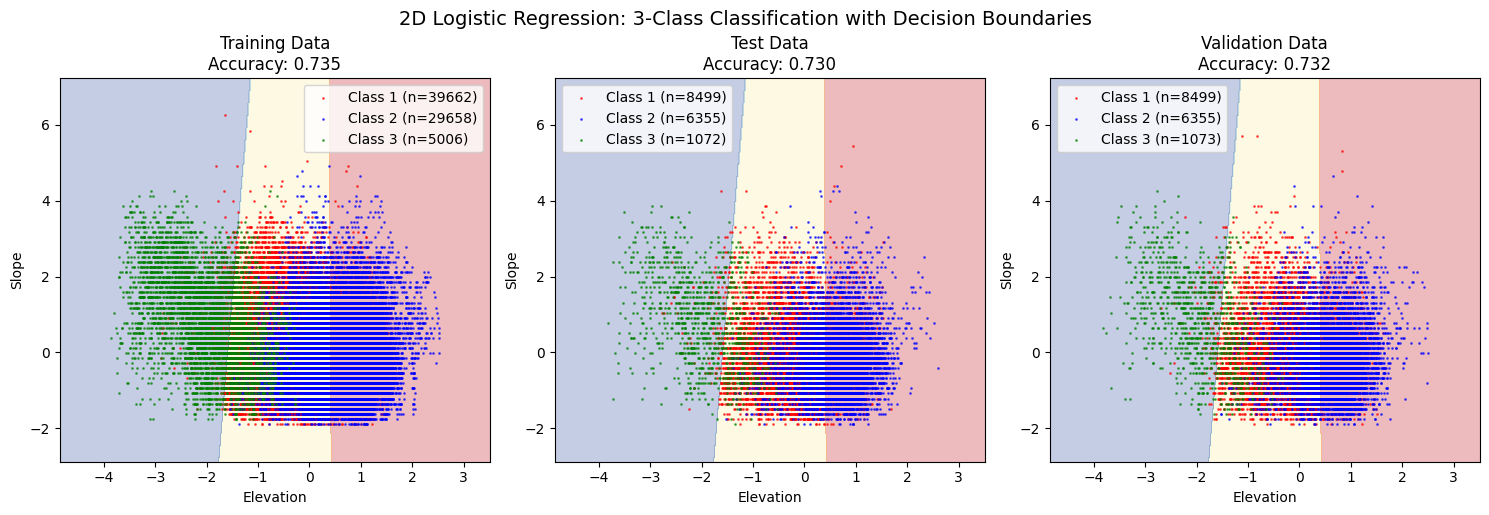

In [12]:
plt.figure(figsize=(15, 5))

h = 0.02  
x_min, x_max = X_train_2features[:, 0].min() - 1, X_train_2features[:, 0].max() + 1
y_min, y_max = X_train_2features[:, 1].min() - 1, X_train_2features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log_reg_3class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['red', 'blue', 'green']
class_names = ['Class 1', 'Class 2', 'Class 3']

# Plot 1: Training Data
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
for i, cls in enumerate(top_3_classes):
    idx = y_train_3class == cls
    plt.scatter(X_train_2features[idx, 0], X_train_2features[idx, 1], 
                c=colors[i], label=f'{class_names[i]} (n={idx.sum()})', alpha=0.6, s=1)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title(f'Training Data\nAccuracy: {train_acc_3class:.3f}')
plt.legend()

# Plot 2: Test Data
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
for i, cls in enumerate(top_3_classes):
    idx = y_test_3class == cls
    plt.scatter(X_test_2features[idx, 0], X_test_2features[idx, 1], 
                c=colors[i], label=f'{class_names[i]} (n={idx.sum()})', alpha=0.6, s=1)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title(f'Test Data\nAccuracy: {test_acc_3class:.3f}')
plt.legend()

# Plot 3: Validation Data
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
for i, cls in enumerate(top_3_classes):
    idx = y_val_3class == cls
    plt.scatter(X_val_2features[idx, 0], X_val_2features[idx, 1], 
                c=colors[i], label=f'{class_names[i]} (n={idx.sum()})', alpha=0.6, s=1)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title(f'Validation Data\nAccuracy: {val_acc_3class:.3f}')
plt.legend()

plt.tight_layout()
plt.suptitle('2D Logistic Regression: 3-Class Classification with Decision Boundaries', 
             fontsize=14, y=1.02)
plt.show()

## Part B: Overfitting Analysis with Regularization

In [13]:
C_values = [0.1, 0.25, 0.5, 0.75, 0.9]
train_accuracies = []
test_accuracies = []
val_accuracies = []

print("Training models with different C values...")
print("C value | Train Acc | Test Acc  | Val Acc   | Overfitting Gap")
print("-" * 65)

for C in C_values:
    # Train logistic regression with different C values
    log_reg_c = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        C=C,
        random_state=42,
        max_iter=1000
    )
    
    # Fit the model
    log_reg_c.fit(X_train_2features, y_train_3class)
    
    # Calculate accuracies
    train_acc = log_reg_c.score(X_train_2features, y_train_3class)
    test_acc = log_reg_c.score(X_test_2features, y_test_3class)
    val_acc = log_reg_c.score(X_val_2features, y_val_3class)
    
    # Store accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    val_accuracies.append(val_acc)
    
    gap = train_acc - test_acc
    
    print(f"{C:7.2f} | {train_acc:9.4f} | {test_acc:9.4f} | {val_acc:9.4f} | {gap:13.4f}")

print("\nCompleted training for all C values.")

Training models with different C values...
C value | Train Acc | Test Acc  | Val Acc   | Overfitting Gap
-----------------------------------------------------------------
   0.10 |    0.7348 |    0.7299 |    0.7317 |        0.0049
   0.25 |    0.7349 |    0.7300 |    0.7318 |        0.0049
   0.50 |    0.7349 |    0.7300 |    0.7318 |        0.0049
   0.75 |    0.7349 |    0.7300 |    0.7317 |        0.0049
   0.90 |    0.7349 |    0.7300 |    0.7317 |        0.0049

Completed training for all C values.


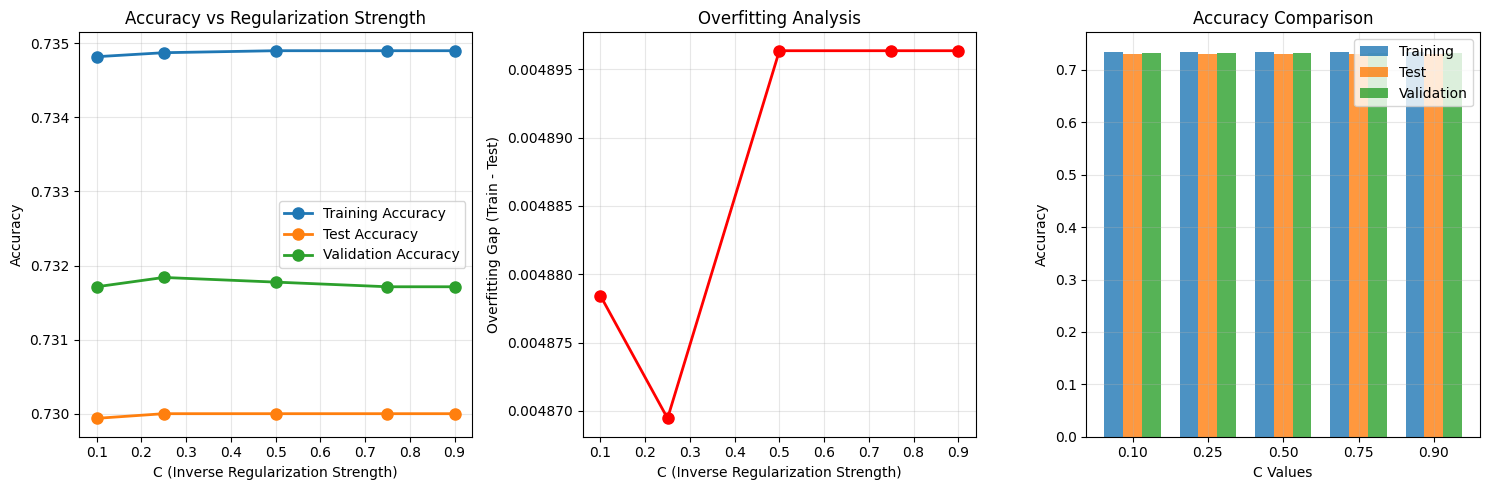


Optimal C value based on test accuracy: 0.25
Best test accuracy: 0.7300

Results Summary:
   C_value  Train_Accuracy  Test_Accuracy  Val_Accuracy  Overfitting_Gap
0     0.10          0.7348         0.7299        0.7317           0.0049
1     0.25          0.7349         0.7300        0.7318           0.0049
2     0.50          0.7349         0.7300        0.7318           0.0049
3     0.75          0.7349         0.7300        0.7317           0.0049
4     0.90          0.7349         0.7300        0.7317           0.0049


In [14]:
plt.figure(figsize=(15, 5))

# Plot 1: Training and Test Accuracy vs C
plt.subplot(1, 3, 1)
plt.plot(C_values, train_accuracies, 'o-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(C_values, test_accuracies, 'o-', label='Test Accuracy', linewidth=2, markersize=8)
plt.plot(C_values, val_accuracies, 'o-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Strength')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Overfitting Gap vs C
training_test_gap = np.array(train_accuracies) - np.array(test_accuracies)
plt.subplot(1, 3, 2)
plt.plot(C_values, training_test_gap, 'ro-', linewidth=2, markersize=8)
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Overfitting Gap (Train - Test)')
plt.title('Overfitting Analysis')
plt.grid(True, alpha=0.3)

# Plot 3: Bar chart comparison
plt.subplot(1, 3, 3)
x = np.arange(len(C_values))
width = 0.25
plt.bar(x - width, train_accuracies, width, label='Training', alpha=0.8)
plt.bar(x, test_accuracies, width, label='Test', alpha=0.8)
plt.bar(x + width, val_accuracies, width, label='Validation', alpha=0.8)
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(x, [f'{c:.2f}' for c in C_values])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_idx = np.argmax(test_accuracies)
optimal_C = C_values[optimal_idx]
print(f"\nOptimal C value based on test accuracy: {optimal_C}")
print(f"Best test accuracy: {test_accuracies[optimal_idx]:.4f}")

results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'Val_Accuracy': val_accuracies,
    'Overfitting_Gap': training_test_gap
})

print("\nResults Summary:")
print(results_df.round(4))

In [15]:
# Extended analysis with wider range of C values to see more variation
extended_C_values = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0, 2.0, 5.0, 10.0]
extended_train_accs = []
extended_test_accs = []
extended_val_accs = []

print("Extended analysis with wider C range...")
print("C value | Train Acc | Test Acc  | Val Acc   | Overfitting Gap")
print("-" * 65)

for C in extended_C_values:

    log_reg_ext = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        C=C,
        random_state=42,
        max_iter=2000
    )
    
    # Fit the model
    log_reg_ext.fit(X_train_2features, y_train_3class)
    
    # Calculate accuracies
    train_acc = log_reg_ext.score(X_train_2features, y_train_3class)
    test_acc = log_reg_ext.score(X_test_2features, y_test_3class)
    val_acc = log_reg_ext.score(X_val_2features, y_val_3class)
    
    # Store accuracies
    extended_train_accs.append(train_acc)
    extended_test_accs.append(test_acc)
    extended_val_accs.append(val_acc)
    
    # Calculate overfitting gap
    gap = train_acc - test_acc
    
    print(f"{C:7.3f} | {train_acc:9.4f} | {test_acc:9.4f} | {val_acc:9.4f} | {gap:13.4f}")

print("\nCompleted extended analysis.")

Extended analysis with wider C range...
C value | Train Acc | Test Acc  | Val Acc   | Overfitting Gap
-----------------------------------------------------------------
  0.001 |    0.7264 |    0.7249 |    0.7249 |        0.0015
  0.010 |    0.7344 |    0.7304 |    0.7311 |        0.0040
  0.100 |    0.7348 |    0.7299 |    0.7317 |        0.0049
  0.250 |    0.7349 |    0.7300 |    0.7318 |        0.0049
  0.500 |    0.7349 |    0.7300 |    0.7318 |        0.0049
  0.750 |    0.7349 |    0.7300 |    0.7317 |        0.0049
  0.900 |    0.7349 |    0.7300 |    0.7317 |        0.0049
  1.000 |    0.7349 |    0.7300 |    0.7317 |        0.0049
  2.000 |    0.7349 |    0.7300 |    0.7317 |        0.0049
  5.000 |    0.7348 |    0.7300 |    0.7317 |        0.0048
 10.000 |    0.7348 |    0.7300 |    0.7317 |        0.0048

Completed extended analysis.


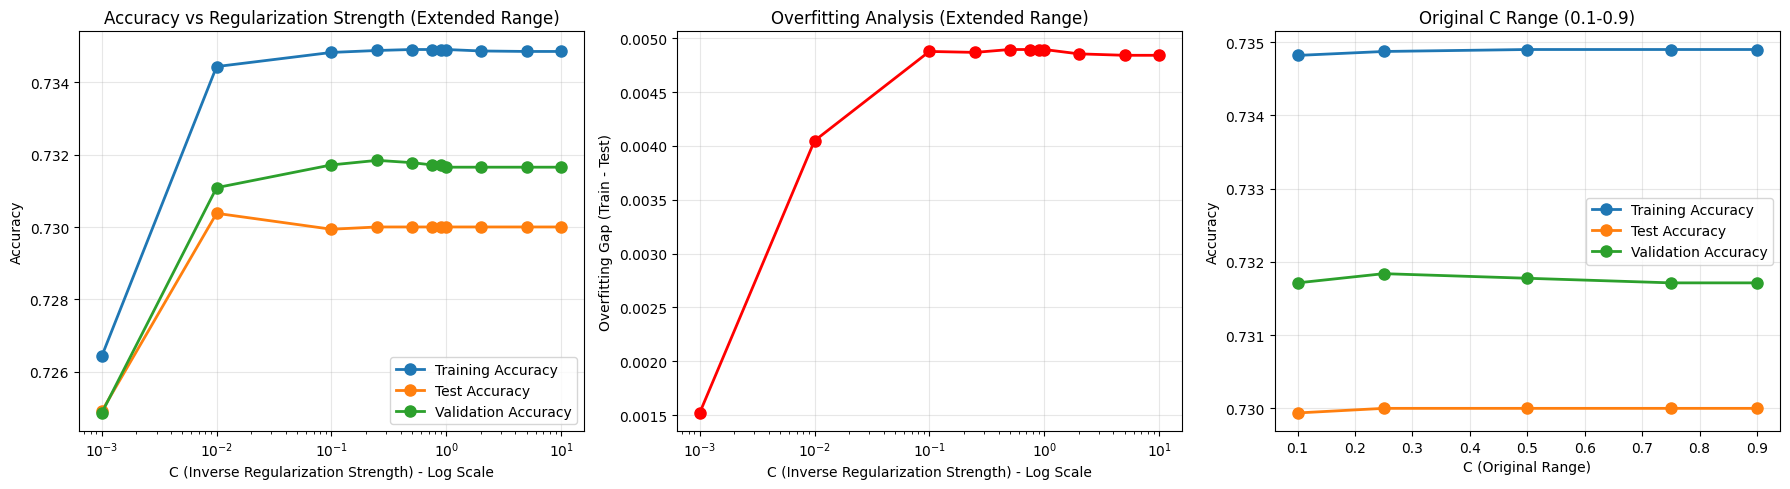


REGULARIZATION ANALYSIS SUMMARY

Strongest Regularization (C=0.001):
  Training Accuracy: 0.7264
  Test Accuracy: 0.7249
  Overfitting Gap: 0.0015

Weakest Regularization (C=10.0):
  Training Accuracy: 0.7348
  Test Accuracy: 0.7300
  Overfitting Gap: 0.0048

Best Test Performance (C=0.01):
  Training Accuracy: 0.7344
  Test Accuracy: 0.7304
  Overfitting Gap: 0.0040

Regularization Insights:
  - Minimum overfitting gap: 0.0015 at C=0.001
  - Maximum overfitting gap: 0.0049 at C=0.5
  - Range of test accuracies: 0.7249 to 0.7304

Extended Results Summary:
    C_value  Train_Accuracy  Test_Accuracy  Val_Accuracy  Overfitting_Gap  \
0     0.001        0.726435       0.724915      0.724870         0.001520   
1     0.010        0.734427       0.730378      0.731086         0.004049   
2     0.100        0.734817       0.729938      0.731713         0.004878   
3     0.250        0.734871       0.730001      0.731839         0.004869   
4     0.500        0.734898       0.730001      0.73

In [16]:
plt.figure(figsize=(18, 5))

# Plot 1: Accuracy vs C (log scale)
plt.subplot(1, 3, 1)
plt.semilogx(extended_C_values, extended_train_accs, 'o-', label='Training Accuracy', linewidth=2, markersize=8)
plt.semilogx(extended_C_values, extended_test_accs, 'o-', label='Test Accuracy', linewidth=2, markersize=8)
plt.semilogx(extended_C_values, extended_val_accs, 'o-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.xlabel('C (Inverse Regularization Strength) - Log Scale')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Strength (Extended Range)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Overfitting Gap vs C (log scale)
extended_gap = np.array(extended_train_accs) - np.array(extended_test_accs)
plt.subplot(1, 3, 2)
plt.semilogx(extended_C_values, extended_gap, 'ro-', linewidth=2, markersize=8)
plt.xlabel('C (Inverse Regularization Strength) - Log Scale')
plt.ylabel('Overfitting Gap (Train - Test)')
plt.title('Overfitting Analysis (Extended Range)')
plt.grid(True, alpha=0.3)

# Plot 3: Zoomed in on original C values
plt.subplot(1, 3, 3)
original_indices = [2, 3, 4, 5, 6]  # Indices for original C values in extended list
original_C_subset = [extended_C_values[i] for i in original_indices]
original_train_subset = [extended_train_accs[i] for i in original_indices]
original_test_subset = [extended_test_accs[i] for i in original_indices]
original_val_subset = [extended_val_accs[i] for i in original_indices]

plt.plot(original_C_subset, original_train_subset, 'o-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(original_C_subset, original_test_subset, 'o-', label='Test Accuracy', linewidth=2, markersize=8)
plt.plot(original_C_subset, original_val_subset, 'o-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.xlabel('C (Original Range)')
plt.ylabel('Accuracy')
plt.title('Original C Range (0.1-0.9)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of regularization effects
print("\n" + "="*60)
print("REGULARIZATION ANALYSIS SUMMARY")
print("="*60)

print(f"\nStrongest Regularization (C=0.001):")
print(f"  Training Accuracy: {extended_train_accs[0]:.4f}")
print(f"  Test Accuracy: {extended_test_accs[0]:.4f}")
print(f"  Overfitting Gap: {extended_gap[0]:.4f}")

print(f"\nWeakest Regularization (C=10.0):")
print(f"  Training Accuracy: {extended_train_accs[-1]:.4f}")
print(f"  Test Accuracy: {extended_test_accs[-1]:.4f}")
print(f"  Overfitting Gap: {extended_gap[-1]:.4f}")

best_test_idx = np.argmax(extended_test_accs)
print(f"\nBest Test Performance (C={extended_C_values[best_test_idx]}):")
print(f"  Training Accuracy: {extended_train_accs[best_test_idx]:.4f}")
print(f"  Test Accuracy: {extended_test_accs[best_test_idx]:.4f}")
print(f"  Overfitting Gap: {extended_gap[best_test_idx]:.4f}")

print(f"\nRegularization Insights:")
print(f"  - Minimum overfitting gap: {min(extended_gap):.4f} at C={extended_C_values[np.argmin(extended_gap)]}")
print(f"  - Maximum overfitting gap: {max(extended_gap):.4f} at C={extended_C_values[np.argmax(extended_gap)]}")
print(f"  - Range of test accuracies: {min(extended_test_accs):.4f} to {max(extended_test_accs):.4f}")

extended_results_df = pd.DataFrame({
    'C_value': extended_C_values,
    'Train_Accuracy': extended_train_accs,
    'Test_Accuracy': extended_test_accs,
    'Val_Accuracy': extended_val_accs,
    'Overfitting_Gap': extended_gap,
    'Regularization_Strength': [1/c for c in extended_C_values]
})

print(f"\nExtended Results Summary:")
print(extended_results_df.round(6))